# API Tokens
- Some services require the negotiation of an access token for each session when accessing an API.
- This process typically consists of 
    - a first call to the API with a user ID and passphrase/secret/password,
    - retreiving a token,
    - using the token in subsequent queries to the API.

## BarentsWatch
- The following is an example based on BartensWatch's API.
- _client\_id_ is the combination of an email address and a client name (see [BarentsWatch API tutorial](https://developer.barentswatch.no/docs/tutorial/)).
- _client\_secret_ is a password connected to the client name.

In [1]:
# This file contains both the client_id and client_secret for the BarentsWatch API.
BW = open('../../../No_sync/BarentsWatch','r').read()
client_id = BW.split('\n')[0]
client_secret = BW.split('\n')[1]
config = {
    'client_id': client_id,
    'client_secret': client_secret,
    'token_url': 'https://id.barentswatch.no/connect/token',
    'api_base_url': 'https://www.barentswatch.no/bwapi'
}

### Convenience functions
- We create two functions for easily requesting a token and data from the API (see _API\_Tokens.py_).
- These are based on the GitHub repository of [BarentsWatch](https://github.com/barentswatch/barentswatch-api-examples)

In [2]:
import API_Tokens as AT
token = AT.get_token(config)

Token request successful


### Requesting data
- Now that the token is in place, we can request data for 3600 seconds before needing a new one.

In [3]:
data_2023_1 = AT.get_request('/v1/geodata/fishhealth/locality/2023/1', token, config)
data_2023_2 = AT.get_request('/v1/geodata/fishhealth/locality/2023/2', token, config)

In [4]:
# Structure of the data
data_2023_1['localities'][0]['hasSalmonoids']

False

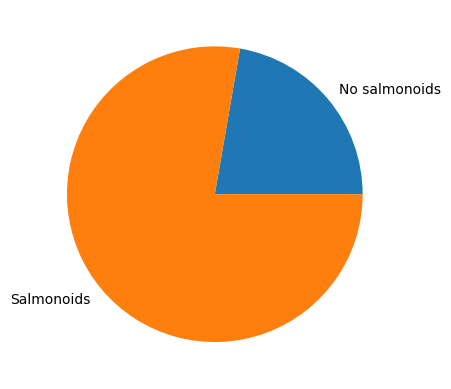

In [5]:
# Extract hasSalmonoids for all localities (at one timepoint)
hasSalmonoids = []
for i in range(len(data_2023_1['localities'])):
    hasSalmonoids.append(data_2023_1['localities'][i]['hasSalmonoids'])

# Make a pie chart of the data
import matplotlib.pyplot as plt
plt.pie([hasSalmonoids.count(False), hasSalmonoids.count(True)], labels = ['No salmonoids', 'Salmonoids'])
plt.show()

```{seealso} Resources
:class: tip
- [BarentsWatch API tutorial](https://developer.barentswatch.no/docs/tutorial/)
- [BarentsWatch GitHub examples](https://github.com/barentswatch/barentswatch-api-examples)
```